In [ ]:
import matplotlib.pyplot as plt
import numpy
import os

import sys
sys.path.append("../src/")

import prepare_eeg_dataset


path = '/path/to/edf/files'
channel = ["CZ"]
classes = ["fnsz"]
frequency = 250
duration = 5


assert os.path.isdir(path)

standard_deviations = []

def gather_standard_deviations(signal_data, source_filename, label, start_index, end_index):
    assert signal_data.ndim == 2
    assert signal_data.shape[0] == len(channel)
    assert len(channel) == 1
    standard_deviations.append(numpy.std(signal_data, axis = -1).item())
    return 0

prepare_eeg_dataset.prepare_eeg_dataset(path,
                                        channel,
                                        classes,
                                        frequency,
                                        duration,
                                        prepare_eeg_dataset._get_ranges_for_labels,
                                        gather_standard_deviations,
                                        120,
                                        None,
                                        None)

Mode of standard deviations: ~9

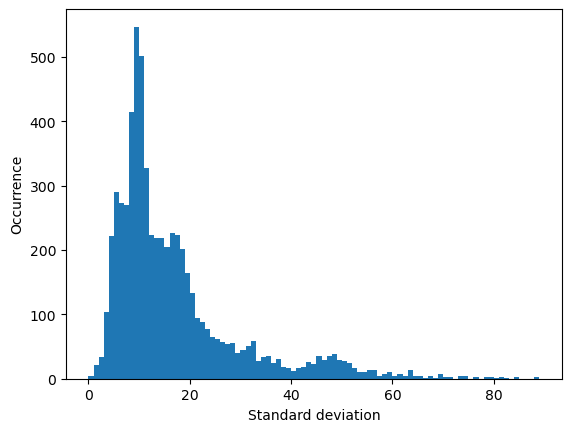

In [5]:
from IPython.display import Markdown

hist, bins = numpy.histogram(standard_deviations, bins = numpy.arange(0, 90))
plt.hist(bins[:-1], bins, weights = hist)
plt.xlabel('Standard deviation')
plt.ylabel('Occurrence')
display(Markdown(f'Mode of standard deviations: ~{numpy.argmax(hist)}'))